In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the dataset
data = pd.read_csv('kidney_disease.csv')

In [3]:
# Display the first five records
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# Number of rows and columns in the dataset
data.shape

(400, 26)

In [5]:
# Drop the id column as it is not imporatant for prediction
data.drop('id', axis =1, inplace = True)

In [6]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
# Rename the columns
data.columns = ['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar', 'Red_Blood_Cells', 'Pus_Cell','Pus_Cell_Clumps',
                'Bacteria', 'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 
                'Packed_Cell_Volume', 'WhiteBC_Count', 'RedBC_Count', 'Hypertension', 'Diabetes_Mellitus',
                'Coronary_Artery_Disease', 'Appetite', 'Pedal_Edema', 'Anemia', 'Class' ]

data.columns

Index(['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cell', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume', 'WhiteBC_Count',
       'RedBC_Count', 'Hypertension', 'Diabetes_Mellitus',
       'Coronary_Artery_Disease', 'Appetite', 'Pedal_Edema', 'Anemia',
       'Class'],
      dtype='object')

In [8]:
# Describe the dataset
data.describe()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Blood_Glucose_Random,Blood_Urea,Serum_Creatinine,Sodium,Potassium,Hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
# Get the no of null values in the columns as a percentage
data.isna().mean()*100

Age                         2.25
Blood_Pressure              3.00
Specific_Gravity           11.75
Albumin                    11.50
Sugar                      12.25
Red_Blood_Cells            38.00
Pus_Cell                   16.25
Pus_Cell_Clumps             1.00
Bacteria                    1.00
Blood_Glucose_Random       11.00
Blood_Urea                  4.75
Serum_Creatinine            4.25
Sodium                     21.75
Potassium                  22.00
Hemoglobin                 13.00
Packed_Cell_Volume         17.50
WhiteBC_Count              26.25
RedBC_Count                32.50
Hypertension                0.50
Diabetes_Mellitus           0.50
Coronary_Artery_Disease     0.50
Appetite                    0.25
Pedal_Edema                 0.25
Anemia                      0.25
Class                       0.00
dtype: float64

In [10]:
# Drop columns with more than 30% null values 
data.drop(['Red_Blood_Cells', 'RedBC_Count'], axis = 1, inplace = True)

# Display the remianing columns
data.shape[1]

23

In [11]:
# Display the data types of the columns
data.dtypes

Age                        float64
Blood_Pressure             float64
Specific_Gravity           float64
Albumin                    float64
Sugar                      float64
Pus_Cell                    object
Pus_Cell_Clumps             object
Bacteria                    object
Blood_Glucose_Random       float64
Blood_Urea                 float64
Serum_Creatinine           float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed_Cell_Volume          object
WhiteBC_Count               object
Hypertension                object
Diabetes_Mellitus           object
Coronary_Artery_Disease     object
Appetite                    object
Pedal_Edema                 object
Anemia                      object
Class                       object
dtype: object

In [12]:
# Display the unique values in each column
for feature in data.columns:
    print(feature, ': ', data[feature].unique(), '\n')

Age :  [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 

Blood_Pressure :  [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 

Specific_Gravity :  [1.02  1.01  1.005 1.015   nan 1.025] 

Albumin :  [ 1.  4.  2.  3.  0. nan  5.] 

Sugar :  [ 0.  3.  4.  1. nan  2.  5.] 

Pus_Cell :  ['normal' 'abnormal' nan] 

Pus_Cell_Clumps :  ['notpresent' 'present' nan] 

Bacteria :  ['notpresent' 'present' nan] 

Blood_Glucose_Random :  [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104.

In [13]:
# Change the object data types to float as the columns contain numeric values 
data['Packed_Cell_Volume'] = pd.to_numeric(data['Packed_Cell_Volume'], errors='coerce')
data['WhiteBC_Count'] = pd.to_numeric(data['WhiteBC_Count'], errors='coerce')

# Display the new data type
print('Data type of Packed_Cell_Volume column: ', data['Packed_Cell_Volume'].dtype)
print('Data type of WhiteBC_Count column: ', data['WhiteBC_Count'].dtype)

Data type of Packed_Cell_Volume column:  float64
Data type of WhiteBC_Count column:  float64


In [14]:

data = data.replace({'Diabetes_Mellitus':{'\tno':'no', '\tyes':'yes', ' yes':'yes'} ,
                     'Coronary_Artery_Disease':{'\tno':'no'}, 
                     'Class':{'ckd\t':'ckd'}})

# Display the changed unique values
pd.unique(data[['Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Class']].values.ravel())

array(['yes', 'no', 'ckd', 'notckd', nan], dtype=object)

In [15]:
features = data.columns
# Divide the columns into categorical and numerical

# Categorical columns
obj_features = np.array([])

# Numerical columns
numeric_features = np.array([])

for feature in features:
    if data[feature].dtypes == object:
        obj_features = np.append(obj_features, feature)
    else:
        numeric_features = np.append(numeric_features, feature)

In [16]:
print('Null values count in Numerical Features \n')

for i in numeric_features:
    print(i, ': ', data[i].isna().sum())

Null values count in Numerical Features 

Age :  9
Blood_Pressure :  12
Specific_Gravity :  47
Albumin :  46
Sugar :  49
Blood_Glucose_Random :  44
Blood_Urea :  19
Serum_Creatinine :  17
Sodium :  87
Potassium :  88
Hemoglobin :  52
Packed_Cell_Volume :  71
WhiteBC_Count :  106


In [17]:
# Replace the null values with the median value of the column
for i in numeric_features:
    data[i].fillna(data[i].median(), inplace =True)

# Display the null value count
for i in numeric_features:
    print(i, ': ', data[i].isna().sum())

Age :  0
Blood_Pressure :  0
Specific_Gravity :  0
Albumin :  0
Sugar :  0
Blood_Glucose_Random :  0
Blood_Urea :  0
Serum_Creatinine :  0
Sodium :  0
Potassium :  0
Hemoglobin :  0
Packed_Cell_Volume :  0
WhiteBC_Count :  0


In [18]:
# data.head(10)

In [19]:
print('Null values count in Categorical Features \n')

for i in obj_features:
    print(i, ': ', data[i].isna().sum())

Null values count in Categorical Features 

Pus_Cell :  65
Pus_Cell_Clumps :  4
Bacteria :  4
Hypertension :  2
Diabetes_Mellitus :  2
Coronary_Artery_Disease :  2
Appetite :  1
Pedal_Edema :  1
Anemia :  1
Class :  0


In [20]:
# Replace the null values in categorical columns woth the frequent value
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data.head(10)

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,Blood_Urea,...,Hemoglobin,Packed_Cell_Volume,WhiteBC_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,36.0,...,15.4,44.0,7800.0,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,121.0,18.0,...,11.3,38.0,6000.0,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,53.0,...,9.6,31.0,7500.0,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,...,11.2,32.0,6700.0,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,26.0,...,11.6,35.0,7300.0,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,normal,notpresent,notpresent,74.0,25.0,...,12.2,39.0,7800.0,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,normal,notpresent,notpresent,100.0,54.0,...,12.4,36.0,8000.0,no,no,no,good,no,no,ckd
7,24.0,80.0,1.015,2.0,4.0,abnormal,notpresent,notpresent,410.0,31.0,...,12.4,44.0,6900.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,abnormal,present,notpresent,138.0,60.0,...,10.8,33.0,9600.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,present,notpresent,70.0,107.0,...,9.5,29.0,12100.0,yes,yes,no,poor,no,yes,ckd


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing   

label = preprocessing.LabelEncoder() 

for i in obj_features:
    data[i]= label.fit_transform(data[i]) 

In [22]:
data

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Pus_Cell,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,Blood_Urea,...,Hemoglobin,Packed_Cell_Volume,WhiteBC_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Class
0,48.0,80.0,1.020,1.0,0.0,1,0,0,121.0,36.0,...,15.4,44.0,7800.0,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,0,0,121.0,18.0,...,11.3,38.0,6000.0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,0,0,423.0,53.0,...,9.6,31.0,7500.0,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,0,1,0,117.0,56.0,...,11.2,32.0,6700.0,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,0,0,106.0,26.0,...,11.6,35.0,7300.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,0,0,140.0,49.0,...,15.7,47.0,6700.0,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,0,0,75.0,31.0,...,16.5,54.0,7800.0,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,0,0,100.0,26.0,...,15.8,49.0,6600.0,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,0,0,114.0,50.0,...,14.2,51.0,7200.0,0,0,0,0,0,0,1


Visualization

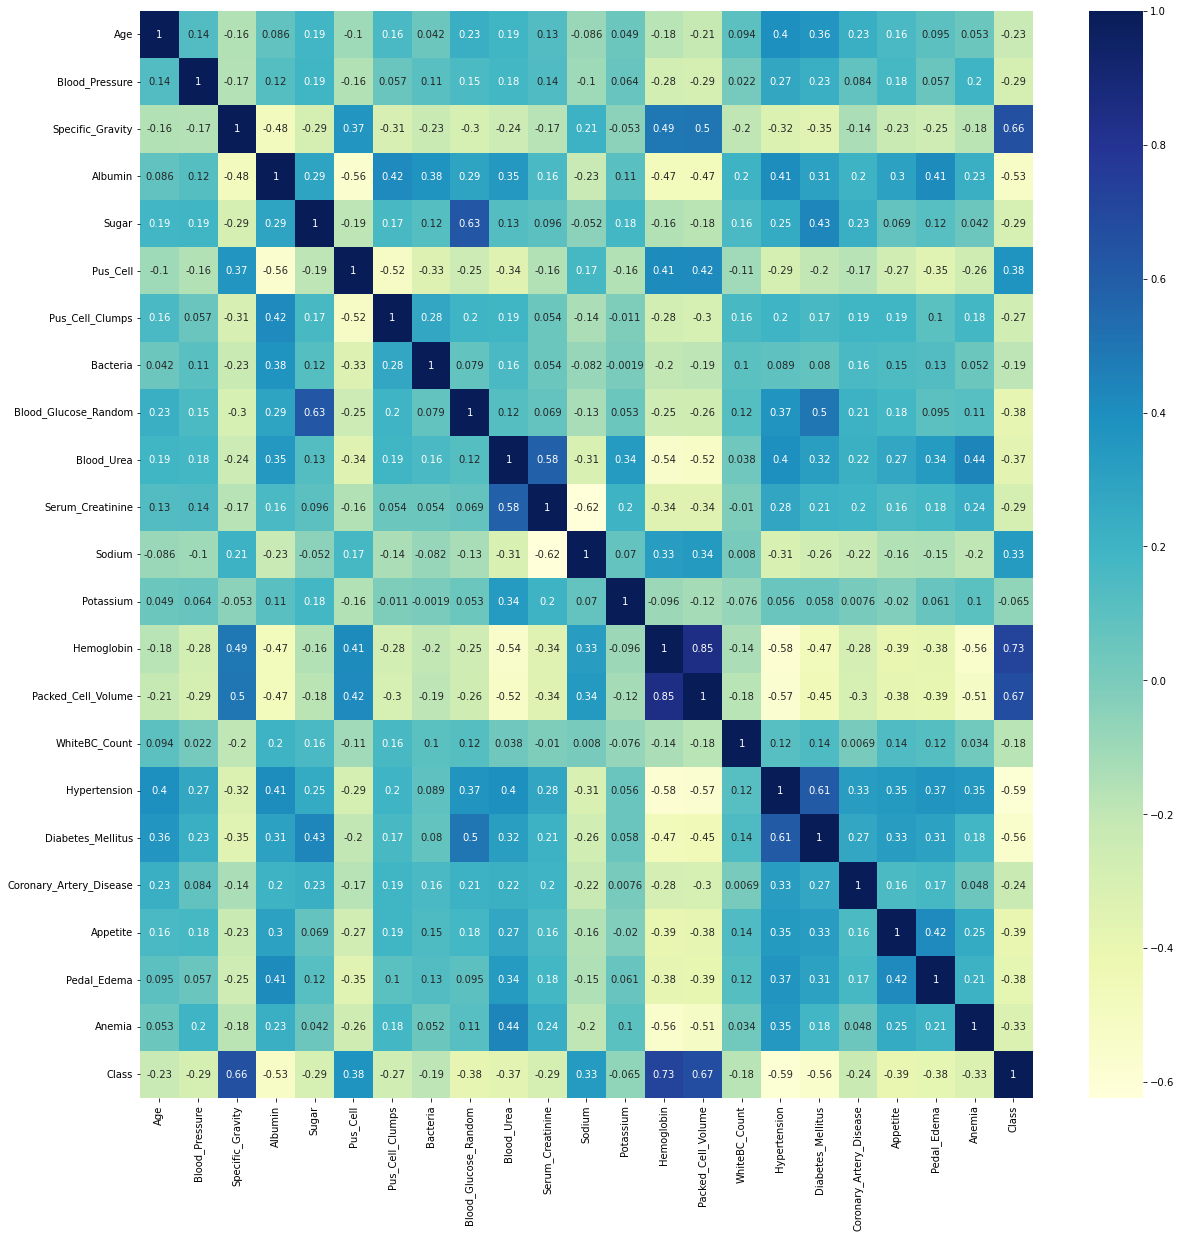

In [23]:
import seaborn as sns

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='Class', ylabel='count'>

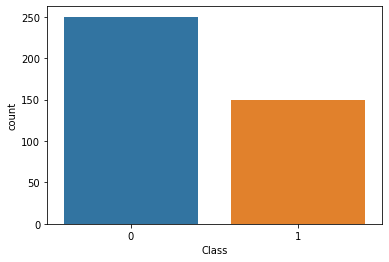

In [24]:
sns.countplot(x = 'Class',data = data)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Blood_Pressure'}>,
        <AxesSubplot:title={'center':'Specific_Gravity'}>,
        <AxesSubplot:title={'center':'Albumin'}>,
        <AxesSubplot:title={'center':'Sugar'}>],
       [<AxesSubplot:title={'center':'Pus_Cell'}>,
        <AxesSubplot:title={'center':'Pus_Cell_Clumps'}>,
        <AxesSubplot:title={'center':'Bacteria'}>,
        <AxesSubplot:title={'center':'Blood_Glucose_Random'}>,
        <AxesSubplot:title={'center':'Blood_Urea'}>],
       [<AxesSubplot:title={'center':'Serum_Creatinine'}>,
        <AxesSubplot:title={'center':'Sodium'}>,
        <AxesSubplot:title={'center':'Potassium'}>,
        <AxesSubplot:title={'center':'Hemoglobin'}>,
        <AxesSubplot:title={'center':'Packed_Cell_Volume'}>],
       [<AxesSubplot:title={'center':'WhiteBC_Count'}>,
        <AxesSubplot:title={'center':'Hypertension'}>,
        <AxesSubplot:title={'center':'Diabetes_Mellitus'}>,
        <AxesSub

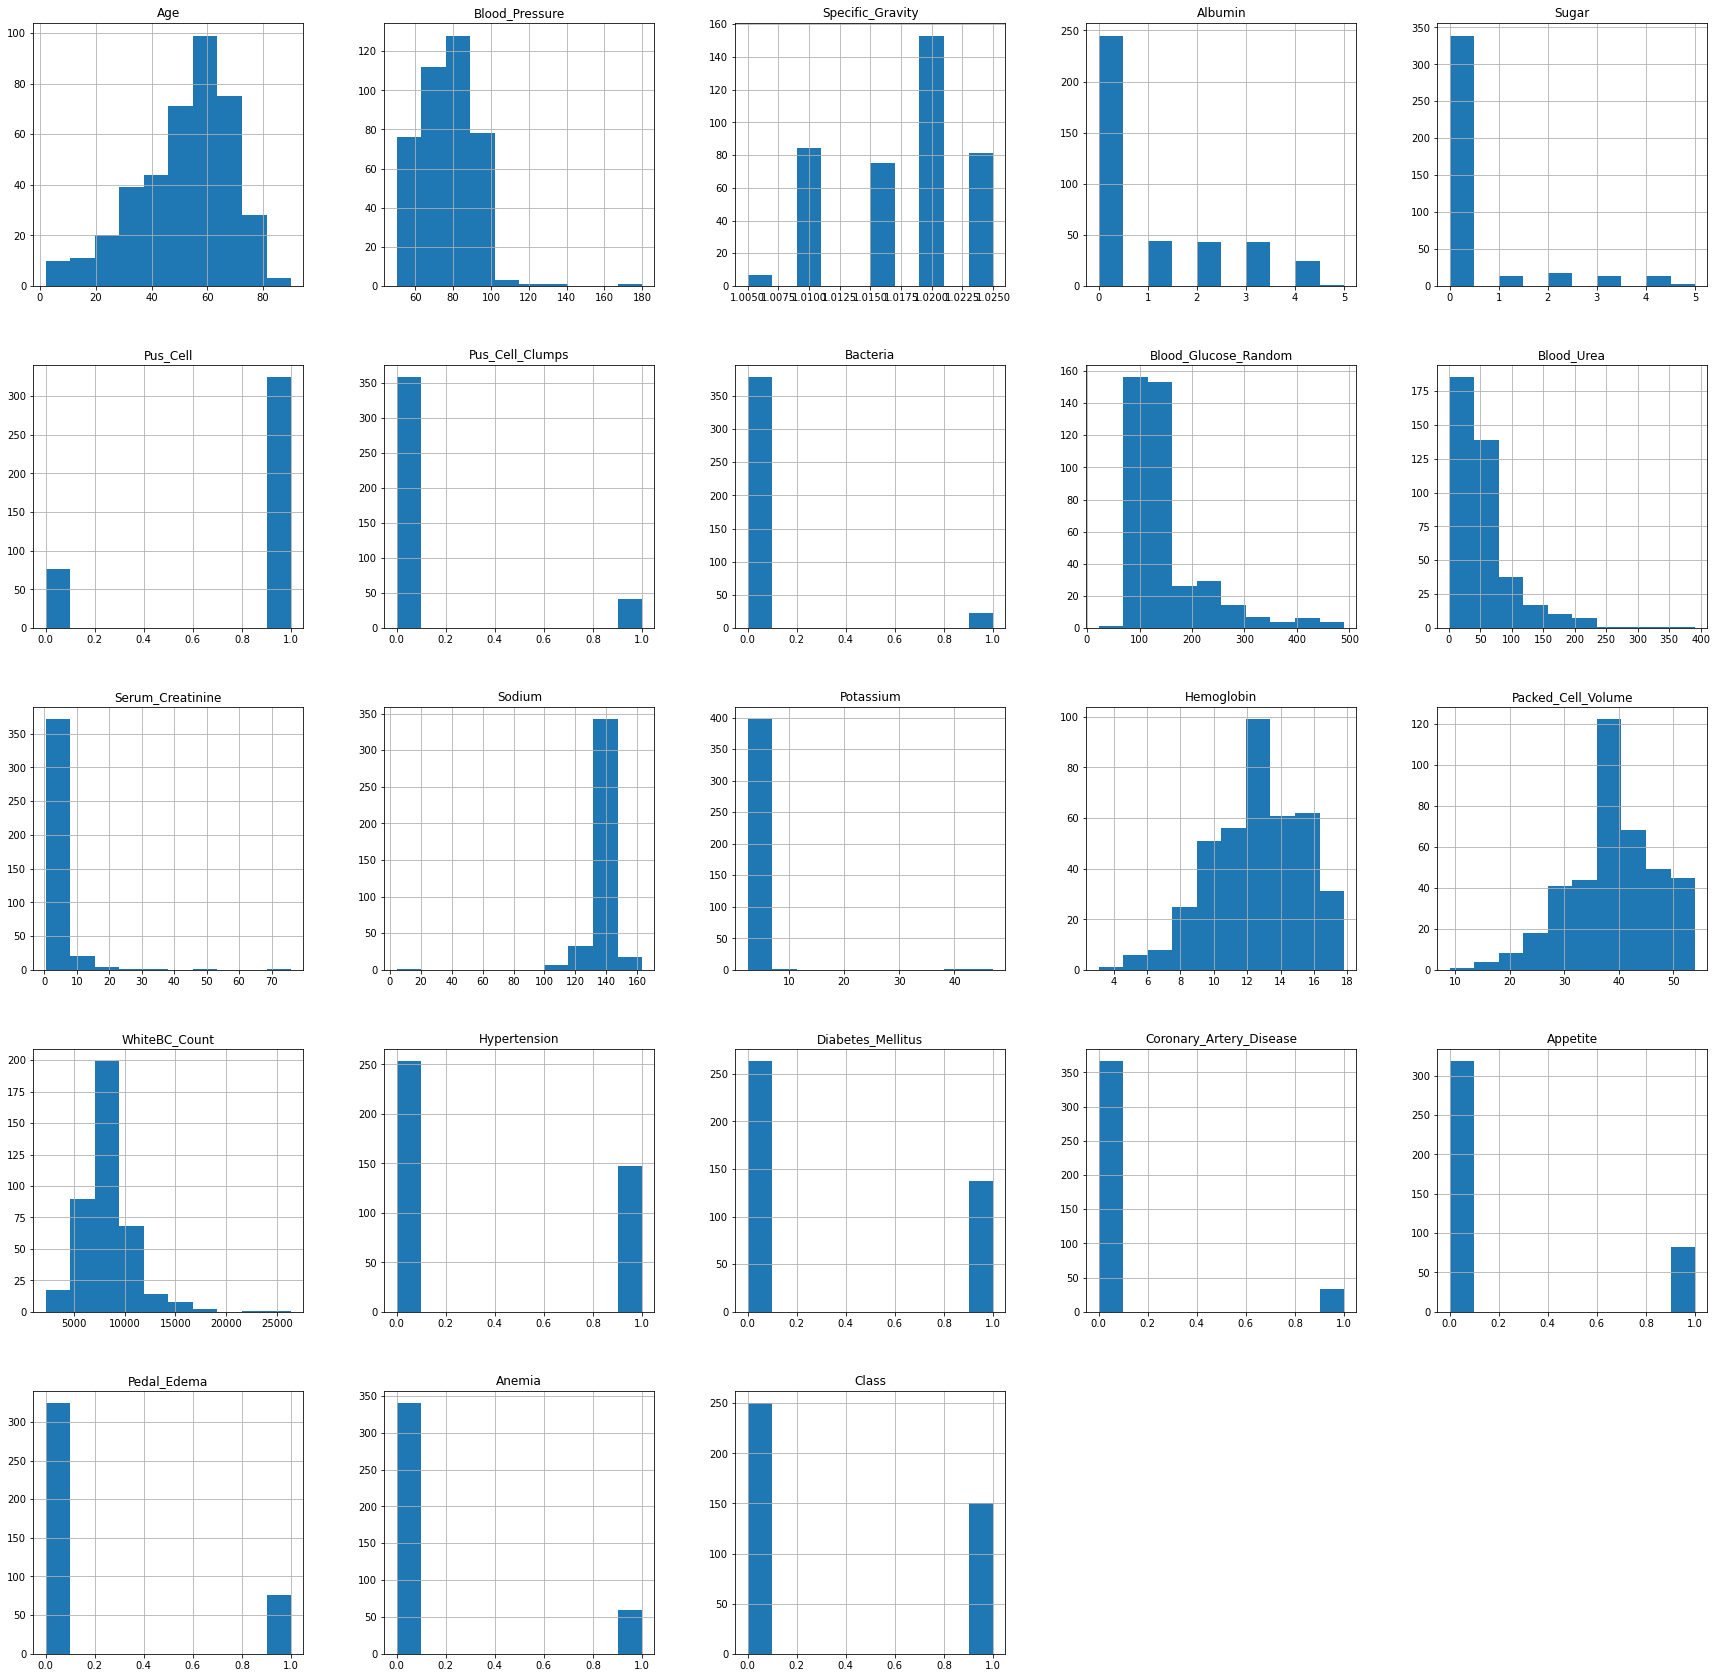

In [25]:
data.hist(figsize = (30,30))

In [26]:
feature = data.drop('Class', axis=1)
label= data['Class']

In [27]:
label

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Class, Length: 400, dtype: int32

## Split Data

In [28]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.2) 

print(feature_train.shape)
print(label_train.shape)
print(feature_test.shape)
print(label_test.shape)

(320, 22)
(320,)
(80, 22)
(80,)


## feature scaling

In [29]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
scaler = MinMaxScaler()

# scaling to the variables
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)

In [30]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create randomforest model
model=RandomForestClassifier(n_estimators=100,random_state=24)


# feeding the training data to the model
model.fit(feature_train, label_train)

# predicting the test set results
# y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Accuracy :", round(model.score(feature_test, label_test)*100.0,2))

Accuracy : 98.75


In [31]:
prediction=model.predict(feature_test)

In [32]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

## Accuracy
accuracy =accuracy_score(label_test,prediction)
## Precision
precision=precision_score(label_test,prediction)
## Recall
recall=recall_score(label_test,prediction)
## F1 Score
f1=f1_score(label_test,prediction)

print(accuracy)
print(recall)
print(f1)

0.9875
0.9615384615384616
0.9803921568627451
